In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np

In [2]:
grav_profile_array = np.loadtxt('Gravity/grav_profile_array.txt')
rtp_profile_array = np.loadtxt('Aeromagnetic/rtp_profile_array.txt')
norm_profile_array = np.loadtxt('Aeromagnetic/norm_profile_array.txt')
dist = np.loadtxt('dist.csv',delimiter=',')

start_profile_mag = 8168.705460645719
end_profile_mag = 26694.88047311687

start_profile_grav = 22635.87934319303
end_profile_grav = 38969.738770111544

In [3]:
original_grav = np.loadtxt('BottGrav.csv',delimiter=',')
original_mag = np.loadtxt('BottMag.csv',delimiter=',')

grav_graph_coords = np.array([[5e3,10],[5e3,70],[50e3,10]])
mag_graph_coords = np.array([[0,30],[0,100],[35e3,30]])

grav_px_coords = np.array([[225,820],[225,218],[1465,819]])
mag_px_coords = np.array([[178,806],[181,176],[1464,809]])

In [4]:
def normalise(vals):
    norm = (vals - np.min(vals))/(np.max(vals)-np.min(vals))
    return norm

In [5]:
def ImportGraphCoords(array,graph_coords,px_coords):

    to_convert = np.column_stack((array[:,1],array[:,2]))

    A = np.vstack([px_coords.T, np.ones(px_coords.shape[0])]).T
    B = graph_coords

    transformation_matrix, _, _, _ = np.linalg.lstsq(A, B, rcond=None)

    converted = np.vstack([to_convert.T, np.ones(to_convert.shape[0])]).T @ transformation_matrix

    return converted

In [6]:
new_grav = ImportGraphCoords(original_grav,grav_graph_coords,grav_px_coords)
new_mag = ImportGraphCoords(original_mag,mag_graph_coords,mag_px_coords)

In [7]:
np.savetxt('BottGrav_coords.csv',new_grav,delimiter=',')
np.savetxt('BottMag_coords.csv',new_mag,delimiter=',')

## Calculating Offset of Gravity Dataset

In [8]:
E2_dist = ImportGraphCoords(np.array([[0,1181,140]]),np.array([[5e3,0],[50e3,0],[50e3,10e3]]),np.array([[197,12],[1298,12],[1298,50]]))
grav_offset = E2_dist[0][0]-dist[13]
print('Grav Offset = ',grav_offset,'m')

Grav Offset =  3905.4026303256396 m


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_16398/1007753819.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


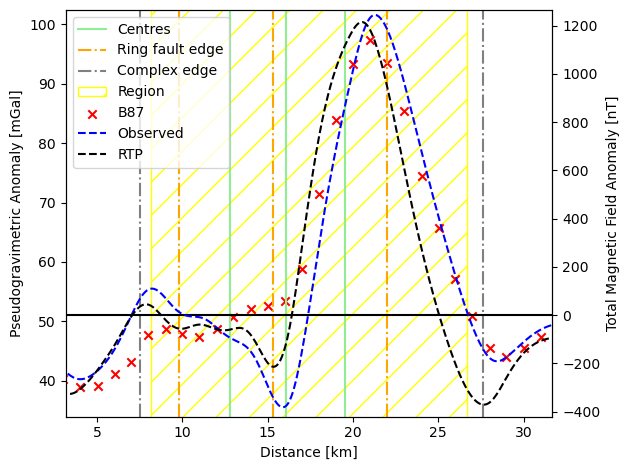

In [9]:
fig,ax = plt.subplots()

ax.axvline(x=dist[3]/1e3,label='Centres',c='lightgreen')
ax.axvline(x=dist[4]/1e3,c='lightgreen')
ax.axvline(x=dist[5]/1e3,c='lightgreen')
ax.axvline(x=dist[9]/1e3,linestyle='-.',c='orange',label='Ring fault edge')
ax.axvline(x=dist[10]/1e3,linestyle='-.',c='orange')
ax.axvline(x=dist[11]/1e3,linestyle='-.',c='orange')
ax.axvline(x=dist[14]/1e3,linestyle='-.',c='gray',label='Complex edge')
ax.axvline(x=dist[15]/1e3,linestyle='-.',c='gray')
ax.fill_betweenx([0,110],[start_profile_mag/1e3,start_profile_mag/1e3],[end_profile_mag/1e3,end_profile_mag/1e3],hatch='/',edgecolor='yellow',facecolor="none",label='Region')
ax.set_ylim(np.min(new_mag[:,1])-5,np.max(new_mag[:,1]+5))
ax2 = ax.twinx()
ax2.axhline(y=0,c='k')

ax.scatter((new_mag[:,0])/1e3,new_mag[:,1],marker='x',c='r',label='B87')
ax.set_ylabel('Pseudogravimetric Anomaly [mGal]')
ax2.set_ylabel('Total Magnetic Field Anomaly [nT]')
ax2.plot(norm_profile_array[:,0]/1e3,norm_profile_array[:,1],"--",c='b', label="Observed")
ax2.plot(rtp_profile_array[:,0]/1e3,rtp_profile_array[:,1],"--",c='k', label="RTP")
ax.set_xlim(start_profile_mag/1e3-5,end_profile_mag/1e3+5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
ax2.set_ylim(np.min(np.concatenate((new_mag[:,1],rtp_profile_array[:,1])))-50,np.max(np.concatenate((new_mag[:,1],rtp_profile_array[:,1])))+50)

handels1,labels1 = ax.get_legend_handles_labels()
handels2,labels2 = ax2.get_legend_handles_labels()
ax.legend(handels1+handels2,labels1+labels2,loc=2)
ax.set_xlabel('Distance [km]')

fig.tight_layout()
fig.savefig('Compare_to_BottMag.pdf')
fig.show()

In [11]:
print('Bott maximum = ',np.max(new_mag[:,1]),' mGal')
print('Observed maximum = ',np.max(norm_profile_array[:,1]),' nT')
print('RTP maximum = ',np.max(rtp_profile_array[:,1]),' nT')

Bott maximum =  97.42209533824784  mGal
Observed maximum =  1245.0926746759478  nT
RTP maximum =  1215.372797174933  nT


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_44608/4057837344.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


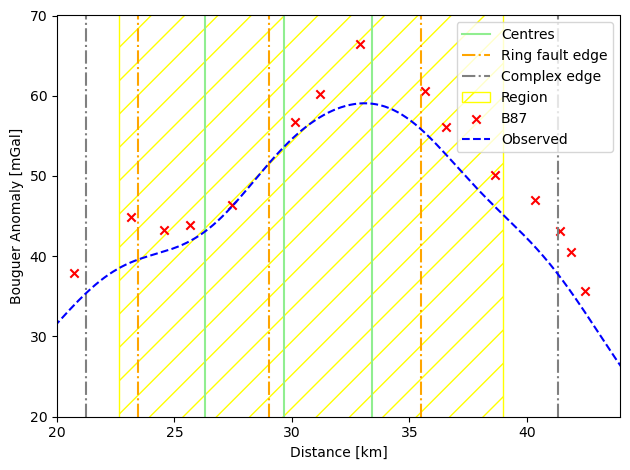

In [ ]:
fig,ax = plt.subplots()

ax.axvline(x=dist[0]/1e3,label='Centres',c='lightgreen')
ax.axvline(x=dist[1]/1e3,c='lightgreen')
ax.axvline(x=dist[2]/1e3,c='lightgreen')
ax.axvline(x=dist[6]/1e3,linestyle='-.',c='orange',label='Ring fault edge')
ax.axvline(x=dist[7]/1e3,linestyle='-.',c='orange')
ax.axvline(x=dist[8]/1e3,linestyle='-.',c='orange')
ax.axvline(x=dist[12]/1e3,linestyle='-.',c='gray',label='Complex edge')
ax.axvline(x=dist[13]/1e3,linestyle='-.',c='gray')
ax.fill_betweenx([0,110],[start_profile_grav/1e3,start_profile_grav/1e3],[end_profile_grav/1e3,end_profile_grav/1e3],hatch='/',edgecolor='yellow',facecolor="none",label='Region')
ax.set_ylim(20,70)

ax.scatter((new_grav[:,0]-grav_offset)/1e3,new_grav[:,1],marker='x',c='r',label='B87')
ax.plot(grav_profile_array[:,0]/1e3,grav_profile_array[:,1],"--",c='b',label='Observed')
ax.legend()
ax.set_xlim(20,end_profile_grav/1e3+5)

ax.set_xlabel('Distance [km]')
ax.set_ylabel('Bouguer Anomaly [mGal]')

fig.savefig('Compare_to_BottGrav.pdf')
fig.tight_layout()
fig.show()

In [12]:
print('Bott maximum = ',np.max(new_grav[:,1]),' mGal')
print('Observed maximum = ',np.max(grav_profile_array[:,1]),' mGal')

Bott maximum =  66.4412174472192  mGal
Observed maximum =  59.061885545805254  mGal
